# Logistic Regression Analysis for Diabetes dataset

__Dataset description__

- Pregnancies
- Glucose
- Blood Pressure
- Skin Thickness
- Insulin
- BMI
- Diabetes Pedigree Function
- Age
- Outcome

__Analysis objective__

Based on various input variables, identify the outcome (whether the person would be diabetic or not)

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load input data file with diabetes data
diabetes_df = pd.read_csv("D:\diabetes.csv")

__Exploratory Data Analysis__

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
correlations = diabetes_df.corr()
correlations['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

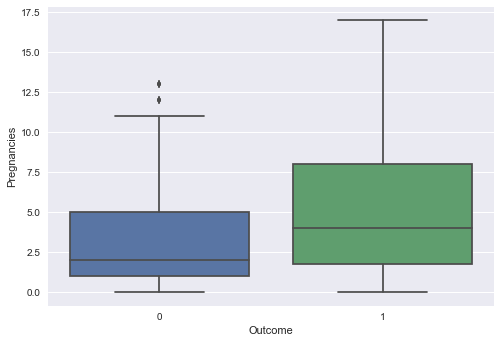

In [6]:
sns.boxplot(x='Outcome', y='Pregnancies', data=diabetes_df)
plt.show()

__Observations:__ 
- _Number of pregancies seems to be good indicator for diabetes_
- _Women with more than 5 pregnancies are more or less falling under diabetic category_ 
- _Women with less than 5 pregnancies are almost evenly distributed between diabetic and non-diabetic categories_
- _There are few outliers where number of pregnancies is 11 or more but the person is not diabetic_ 

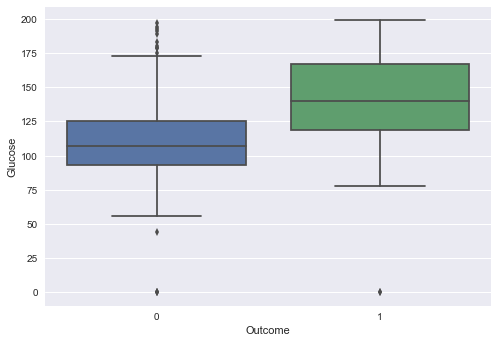

In [7]:
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_df)
plt.show()

__Observations:__ 
- _Glucose levels seem to be good indicator for diabetes_
- _Women with higher glucose levels (120 and above) are falling under diabetic category_ 
- _Women with lower glucose levels (125 and below) are falling non-diabetic category_
- _There are some borderline cases (120 - 125) where there are both diabetic and non-diabetic cases_
- _There are few outliers with glucose levels above 175 where the person is not diabetic_ 

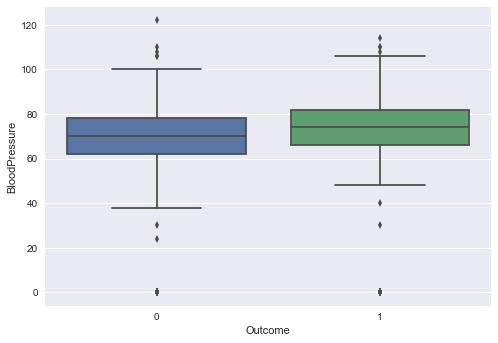

In [8]:
sns.boxplot(x='Outcome', y='BloodPressure', data=diabetes_df)
plt.show()

__Observations:__ 
- _Blood Pressure doesn't seem to be a good indicator for diabetes_
- _There are both diabetic and non-diabetic cases in similar blood pressure range_
- _There are few outliers in either of the categories_
- _There are few cases where blood pressure is almost 0, which doesn't seem realsitic except for specific medical conditions where person might be under medical observation/treatment_

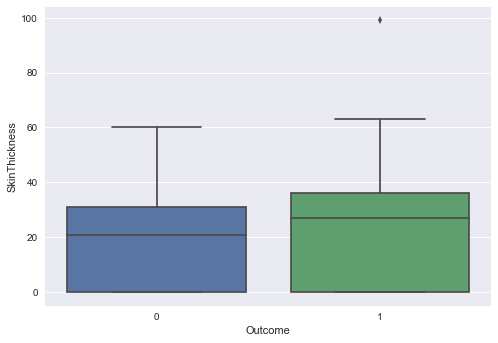

In [9]:
sns.boxplot(x='Outcome', y='SkinThickness', data=diabetes_df)
plt.show()

__Observations:__ 
- _Skin Thickness doesn't seem to be a good indicator for diabetes_
- _There are both diabetic and non-diabetic cases in similar skin thickness range_
- _There are no outliers_

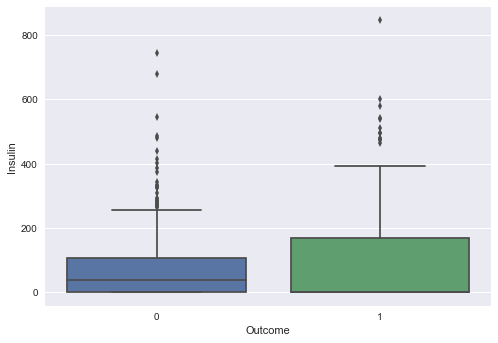

In [10]:
sns.boxplot(x='Outcome', y='Insulin', data=diabetes_df)
plt.show()

__Observations:__ 
- _Insulin level doesn't seem to be that good an indicator for diabetes_
- _Below 120 level there are both diabetic and non-diabetic cases_
- _Above 120 level there are more diabetic cases but then there are quite a few outliers where even with higher insulin levels people are non-diabetic_

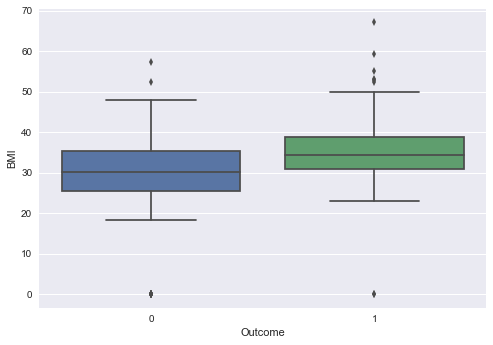

In [11]:
sns.boxplot(x='Outcome', y='BMI', data=diabetes_df)
plt.show()

__Observations:__ 
- _BMI seems to be a good indicator for diabetes_
- _Though there is some overlap higher BMI seems to be associated with diabetes_
- _There are few outliers in either of the categories_

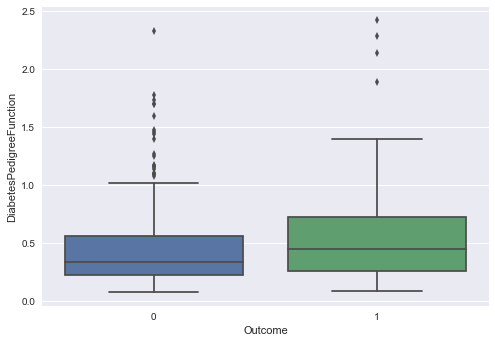

In [12]:
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes_df)
plt.show()

__Observations:__ 
- _Diabetes Pedigree Function doesn't seem to be that good an indicator for diabetes_
- _Below 0.6 there are both diabetic and non-diabetic cases_
- _Above 0.6 level there are more diabetic cases but then there are quite a few outliers where even with higher Diabetes Pedigree Function people are non-diabetic_

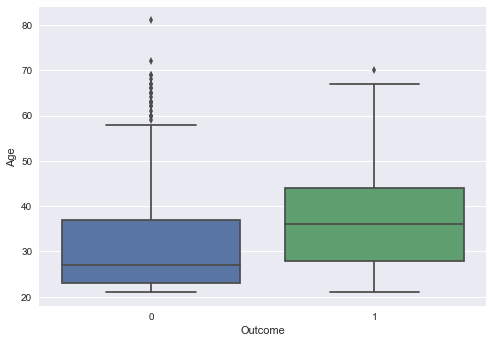

In [13]:
sns.boxplot(x='Outcome', y='Age', data=diabetes_df)
plt.show()

__Observations:__ 
- _Age seems to be an indicator for diabetes_
- _There are higher cases of diabetes above the age of 38_
- _There are quite a few outliers as well where though age is high but people are non-diabetic_

In [35]:
#defining feature set based on above correlatins
x = diabetes_df[['Glucose', 'Age', 'Pregnancies', 'BMI']]
y = diabetes_df['Outcome']

In [36]:
#splitting the data into training and testing data sets with 70:30 ratio
from sklearn.cross_validation import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.30)

In [37]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1e42)
logreg.fit(x, y)
print(logreg.coef_)
print(logreg.intercept_)

[[ 0.03318893  0.01288166  0.11347879  0.08286994]]
[-8.39326804]


In [38]:
#fitting the model for training data
logreg.fit(xTrain, yTrain)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
#applying model on test and train data
y_log_pred_test = logreg.predict(xTest)
y_log_pred_train = logreg.predict(xTrain)

In [40]:
#comparing the metrics for predicted label and actual label of test data
metrics.accuracy_score(yTest, y_log_pred_test)

0.76623376623376627

In [58]:
#creating confusion matrix to understand the classification
confusion_matrix = metrics.confusion_matrix(yTest, y_log_pred_test)
print (confusion_matrix)

[[126  21]
 [ 33  51]]


In [54]:
positive_cases = diabetes_df.query('Outcome==1').Outcome.count()
negative_cases = diabetes_df.query('Outcome==0').Outcome.count()
print("Positive Cases: ", positive_cases)
print("Negative Cases: ", negative_cases)

Positive Cases:  268
Negative Cases:  500


__Observations:__ 
- _There are more negative cases (almost double) compared to positive cases, thereby introducing bias in accuracy metrics_
- _We would be more interested in positive cases so that cure/medicaiton can be planned for persons suffering from diabetes. Misssing out any such cases or misinterpreting could be detrimental_
- _This essentially means we need to look for more metrcis that could help us predict positive cases better_

In [59]:
true_negative = confusion_matrix[0,0]
true_positive = confusion_matrix[1,1]
false_negative = confusion_matrix[1,0]
false_positive = confusion_matrix[0,1]
print ("True Negative: ", true_negative)
print ("True Positive: ", true_positive)
print ("False Negative: ", false_negative)
print ("False Positive: ", false_positive)

True Negative:  126
True Positive:  51
False Negative:  33
False Positive:  21


In [60]:
classification_accuracy = (true_negative + true_positive)/(true_negative + true_positive + false_negative + false_positive)
print ("Classification Accuracy: ",classification_accuracy)

Classification Accuracy:  0.766233766234


In [61]:
classification_error = 1 - classification_accuracy
print ("Classification Error: ",classification_error)

Classification Error:  0.233766233766


In [63]:
#measure how many time we predicted the postive cases correctly out of total positive cases
sensitivity = true_positive/(true_positive + false_negative)
print("Sensitivity: ", sensitivity)

Sensitivity:  0.607142857143


In [64]:
#measure how many time we predicted the negative cases correctly out of total negative cases
specificity = true_negative/(true_negative + false_positive)
print("Specificity: ", specificity)

Specificity:  0.857142857143


In [65]:
#measure false positive rate
false_positive_rate = false_positive/(true_negative + false_positive)
print("False Positive Rate: ", false_positive_rate)

False Positive Rate:  0.142857142857


In [67]:
#measure how many times the prediction is correct for positive cases out of all predictions
precision = true_positive/(true_positive + false_positive)
print("Precision: ", precision)

Precision:  0.708333333333


In [70]:
#check predictions based on default threshold
logreg.predict(xTest)[0:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
logreg.predict_proba(xTest)[0:10]

array([[ 0.8418993 ,  0.1581007 ],
       [ 0.76396574,  0.23603426],
       [ 0.53955643,  0.46044357],
       [ 0.94515069,  0.05484931],
       [ 0.96555553,  0.03444447],
       [ 0.80713906,  0.19286094],
       [ 0.2326272 ,  0.7673728 ],
       [ 0.85428954,  0.14571046],
       [ 0.95490298,  0.04509702],
       [ 0.84332996,  0.15667004]])

In [72]:
logreg.predict_proba(xTest)[0:10,1]

array([ 0.1581007 ,  0.23603426,  0.46044357,  0.05484931,  0.03444447,
        0.19286094,  0.7673728 ,  0.14571046,  0.04509702,  0.15667004])

In [73]:
y_pred_prob = logreg.predict_proba(xTest)[:,1]

In [74]:
%matplotlib inline
import matplotlib.pyplot  as plt
plt.rcParams['font.size']=12

(0, 1)

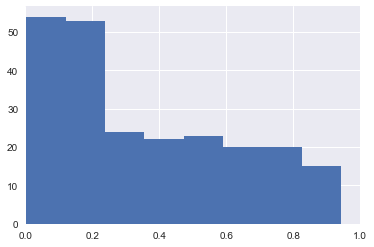

In [75]:
plt.hist(y_pred_prob,bins=8)
plt.xlim(0,1)

__Observations:__ 
- _Probabilty values are skewed towards negative cases owing to the way data is distributed_
- _Mean probability value of 0.5 may not be a good threshold to demarcate positive (>=0.5) and negative (<0.5) cases_
- _Threshold needs to be revised based on above distribution. Above histogram suggests that most data is concentrated around the probability value of 0.2_

In [92]:
#revise threshold to 0.2 and reclaculate the metrics
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob,0.2)[0]

C:\Users\EE210296\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [93]:
y_pred_prob[0:10]

array([ 0.1581007 ,  0.23603426,  0.46044357,  0.05484931,  0.03444447,
        0.19286094,  0.7673728 ,  0.14571046,  0.04509702,  0.15667004])

In [94]:
y_pred_class[0:10]

array([ 0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [95]:
new_confusion_matrix = metrics.confusion_matrix(yTest,y_pred_class)
print(new_confusion_matrix)

[[84 63]
 [ 7 77]]


In [96]:
new_sensitivity = 77/(7+77)
print(new_sensitivity)

0.9166666666666666


In [97]:
new_specificity = 84/(84+63)
print(new_specificity)

0.5714285714285714


In [99]:
new_false_positive_rate = 63/(84 + 63)
print(new_false_positive_rate)

0.42857142857142855


In [100]:
new_precision = 77/(77 + 63)
print(new_precision)

0.55


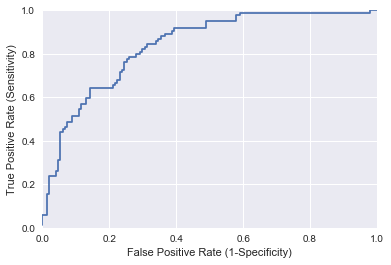

In [104]:
#plot roc curve to check the metrics at different thresholds
fpr,tpr,thresholds = metrics.roc_curve(yTest,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")

In [107]:
#calculate AUC (ares under ROC curve) to avoid compication around choosing the right threshold when the data is imbalanced
print(metrics.roc_auc_score(yTest, y_pred_prob))

0.837220602527


__Observations:__ 
- _Higher value of AUC indicates better classification_

In [106]:
#calculate cross-validated AUC to aovid the bias in test and training data selection
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, x, y, cv=10, scoring='roc_auc').mean()

0.82479202279202268